# Linear Regression


In [44]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

In [45]:
from sklearn.datasets import load_boston

data = load_boston() # reading data

In [46]:
# creating dataframe 

df = pd.DataFrame(data.data, columns = data.feature_names)

In [47]:
# adding target value to the data

df['MEDV'] = data.target

## Basic EDA

In [48]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [52]:
# Checking for missing values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## EDA

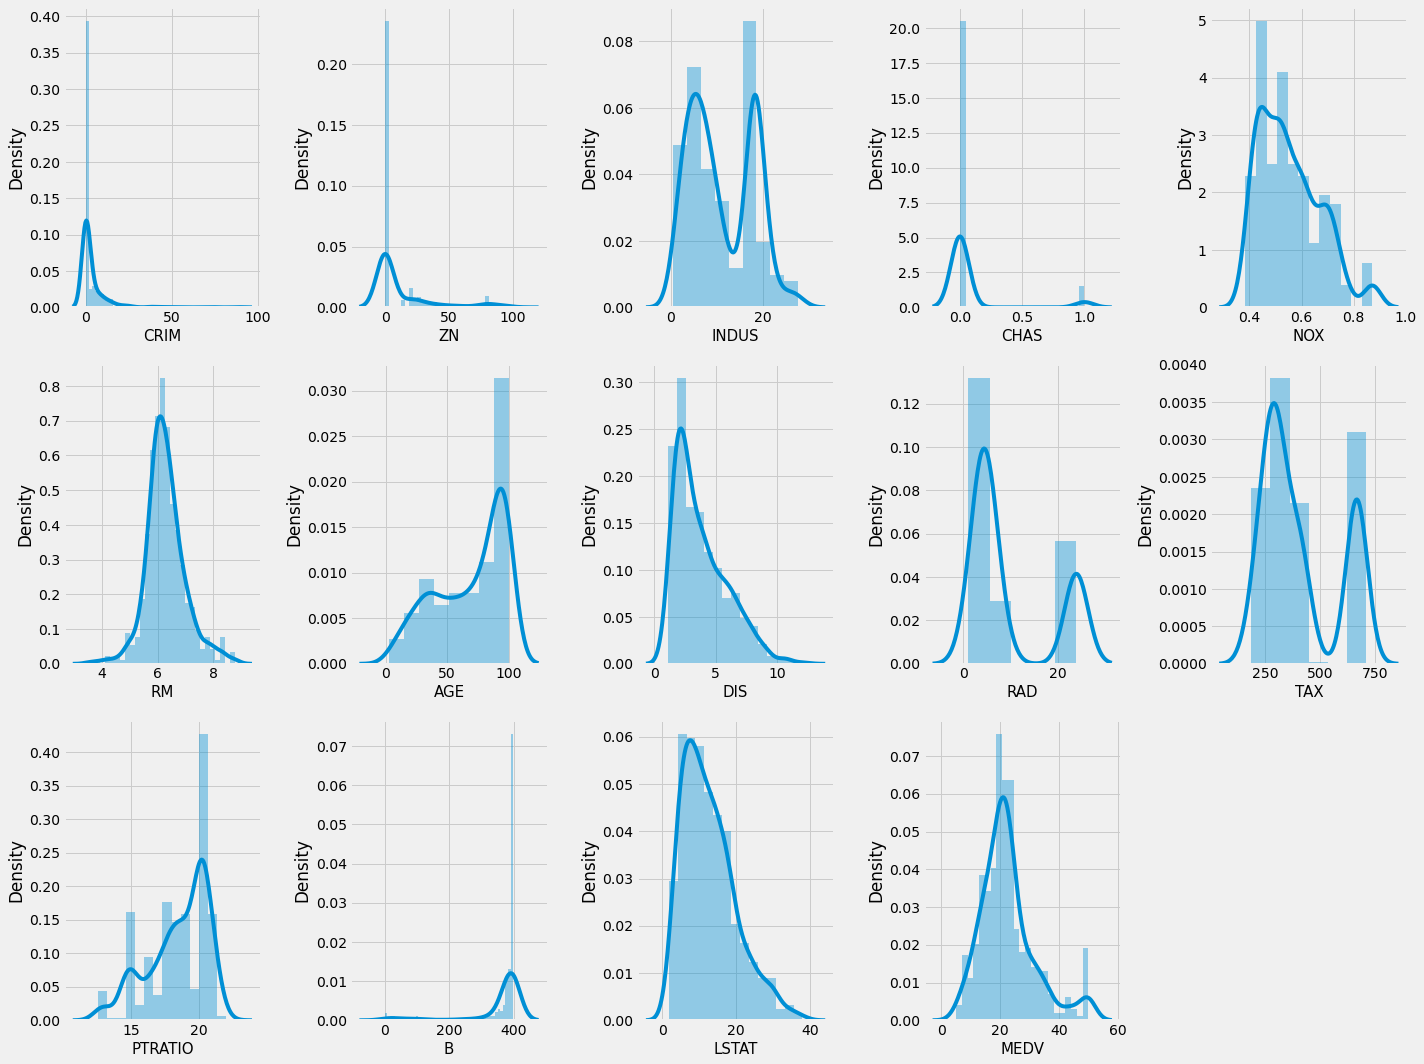

In [53]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

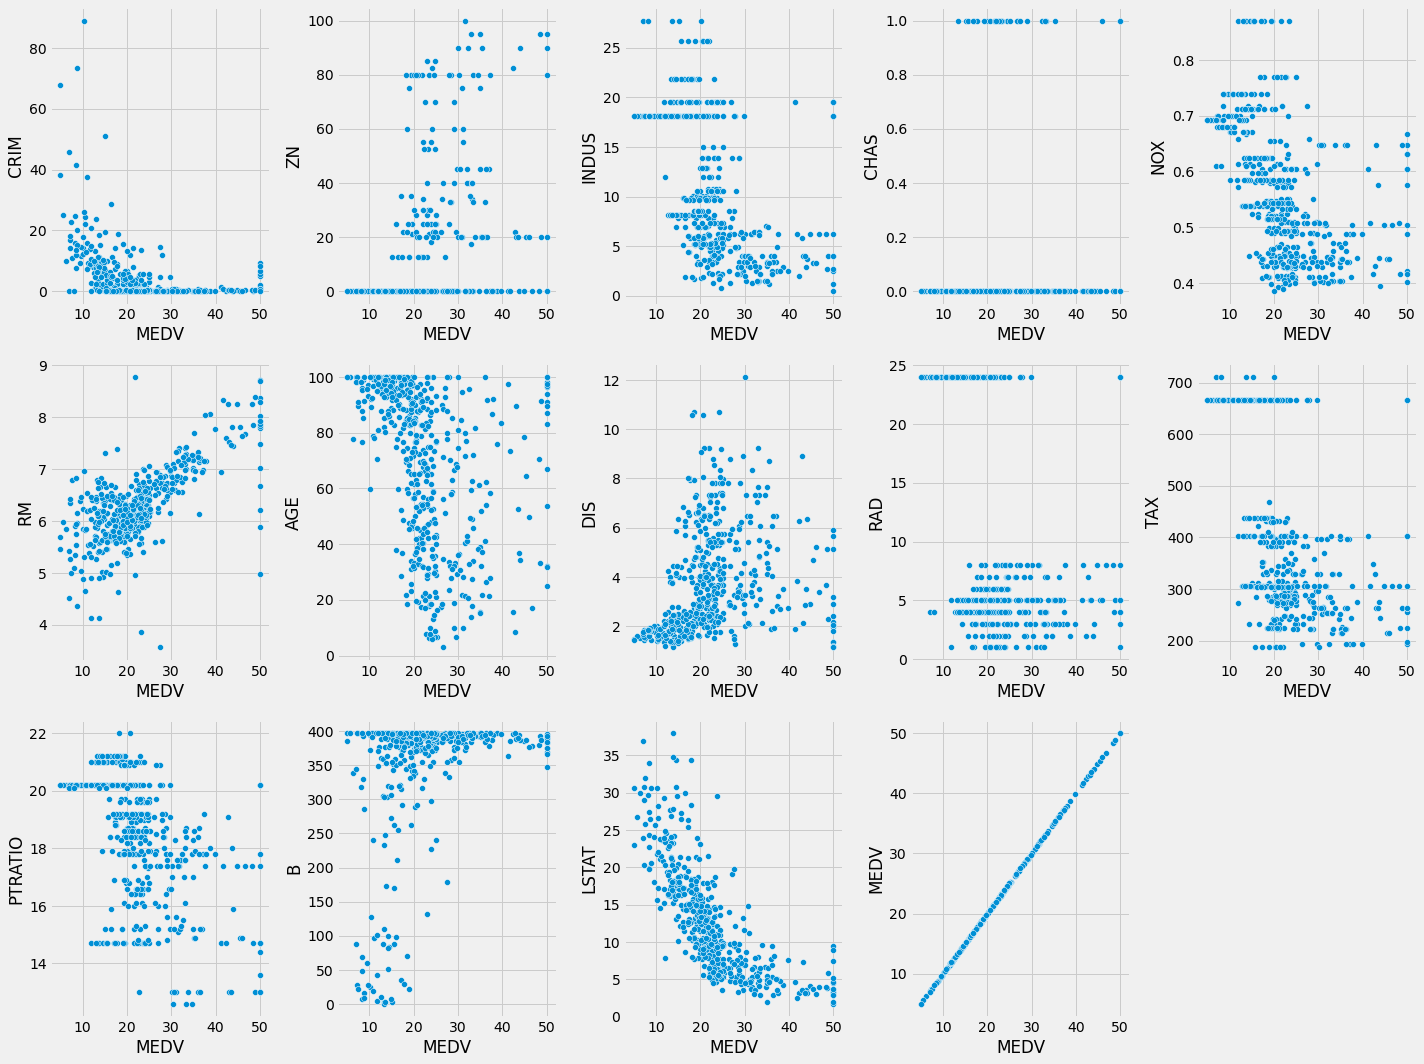

In [54]:
# Plotting `Price` with remaining columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['MEDV'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()


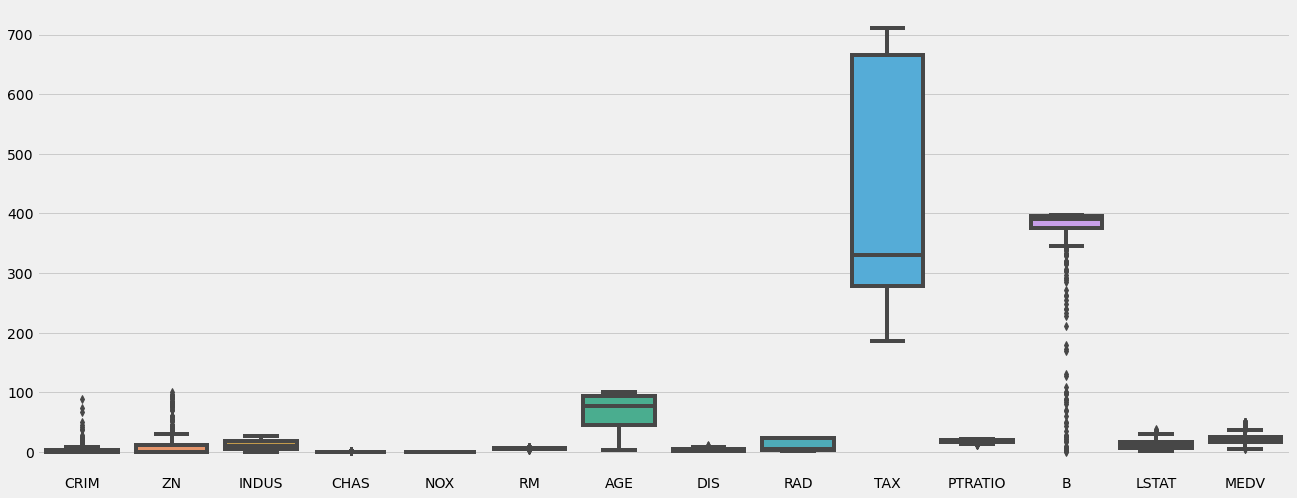

In [55]:
# looking for outliers using box plot

plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

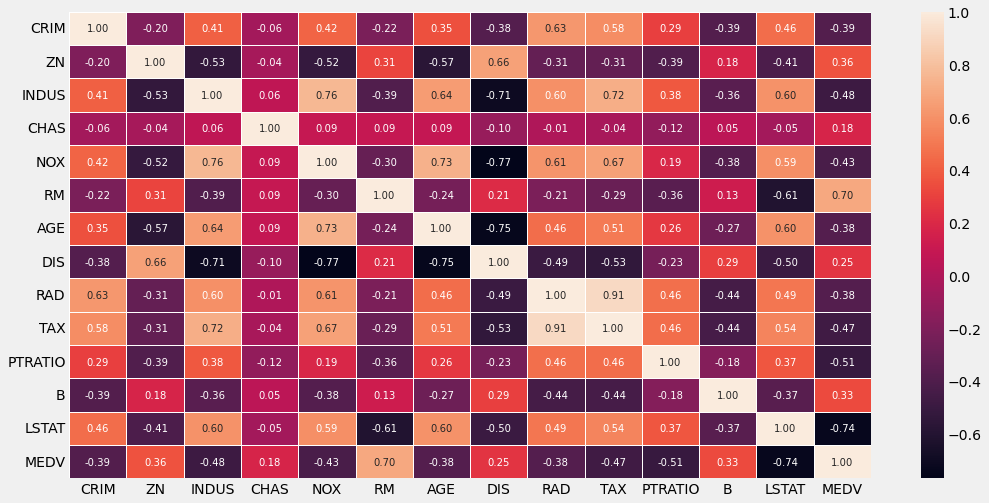

In [56]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [57]:
X = df.drop(columns = 'MEDV', axis = 1)
y = df['MEDV']

In [58]:
# splitting data into training asnd test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [59]:
# fitting training data to model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Check Coefficient

model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [61]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable' : X.columns, 'coef' : model.coef_, 'abs_coef' : np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef' , inplace = True, ascending = False)
    sns.barplot(x = 'variable', y = 'coef', data = model_coefs)

In [63]:
# prediction of model

y_pred = model.predict(X_test)

In [64]:
# training accuracy of model

model.score(X_train, y_train)

0.7645451026942549

In [65]:
# test accuracy of model

model.score(X_test, y_test)

0.6733825506400175

## Lasso Regression

In [26]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [70]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

0.0005927671694272829

In [28]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0005927671694272829)

In [29]:
lasso.score(X_train, y_train)

0.7645435654057626

In [30]:
lasso.score(X_test, y_test)

0.6732723813618644

In [31]:
print(adj_r2(X_train, y_train, lasso))

0.7555408193771594


In [32]:
print(adj_r2(X_test, y_test, lasso))

0.6424936926495763


## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([2.63385442, 3.85137348, 4.74779679, 4.85289375, 8.28854267,
       8.99885281, 4.47551811, 6.64346122, 9.83138912, 3.1462608 ,
       7.97083066, 0.04231823, 2.16273143, 6.89911672, 1.66876432,
       8.22722241, 8.87361058, 2.33101298, 9.59343779, 2.39329467,
       1.20995245, 9.5611326 , 4.5295021 , 7.4331104 , 6.14280887,
       8.81953622, 1.57890169, 8.67589783, 5.56868593, 8.01739881,
       8.91732456, 4.68543599, 4.6130808 , 7.16861895, 5.9638566 ,
       0.06588909, 6.4162632 , 6.40336741, 5.84360001, 4.49690905,
       7.50730537, 6.95606836, 4.08342871, 5.28963846, 7.11529774,
       0.5451378 , 0.40775448, 7.92272876, 7.49918099, 3.44334568]),
        cv=10, normalize=True)

In [35]:
# best alpha parameter

alpha = ridge_cv.alpha_
alpha

0.0658890917236199

In [36]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.0658890917236199)

In [37]:
ridge.score(X_train, y_train)

0.7645125246040732

In [38]:
ridge.score(X_test, y_test)

0.6728329398399255

In [39]:
print(adj_r2(X_train, y_train, ridge))

0.7555085917212877


In [40]:
print(adj_r2(X_test, y_test, ridge))

0.6420128544625272
